In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from visualise import visualise_v_quiver

In [2]:
# Import all simulation functions
from simulate import (
    simulate_convergence,
    simulate_branching,
    simulate_merge,
    simulate_deflection,
    simulate_ridge,
)

# Define simulations as a dictionary with names as keys to function objects
simulations = {
    "convergence": simulate_convergence,
    "branching": simulate_branching,
    "merge": simulate_merge,
    "deflection": simulate_deflection,
    "ridge": simulate_ridge,
}

# Plots suitable for dfNN

In [ ]:
model_name = "dfNN"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfNN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "dfNN"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfNN_test_predictions.pt"
    pred = torch.load(path) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# PINN

- plot both loss components

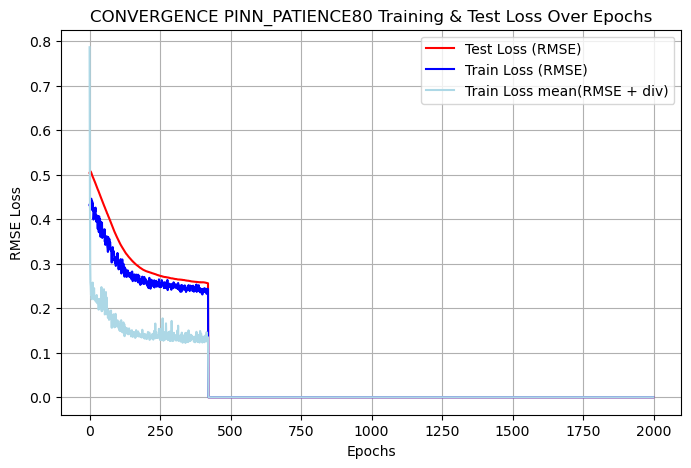

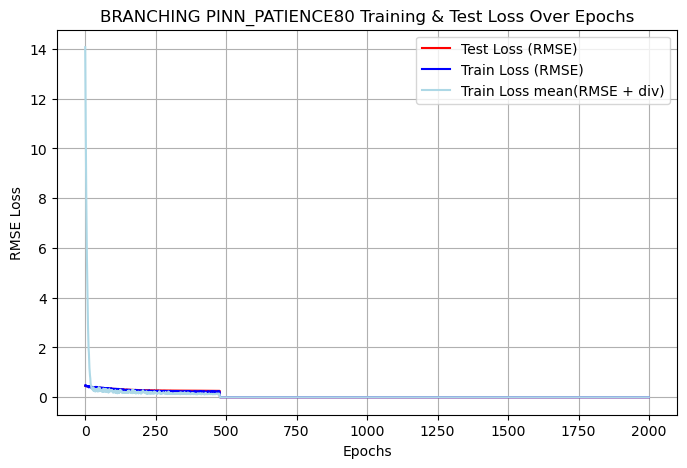

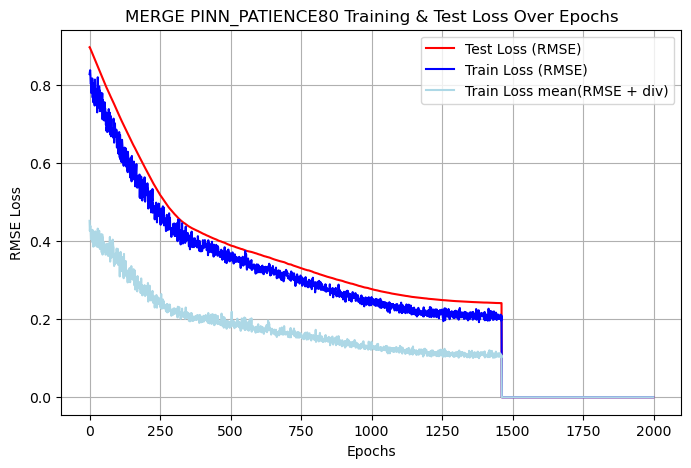

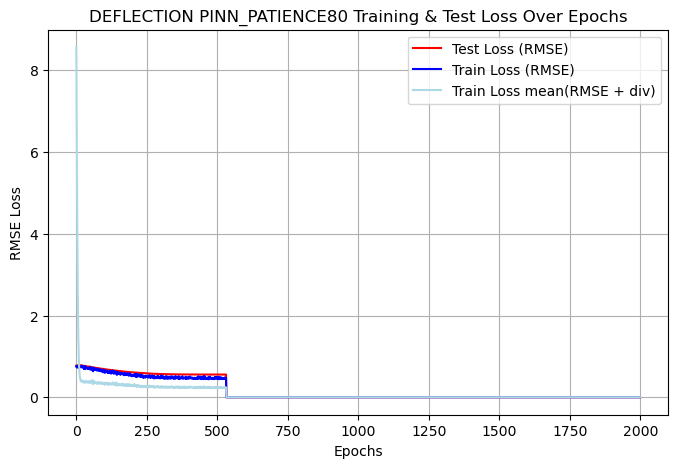

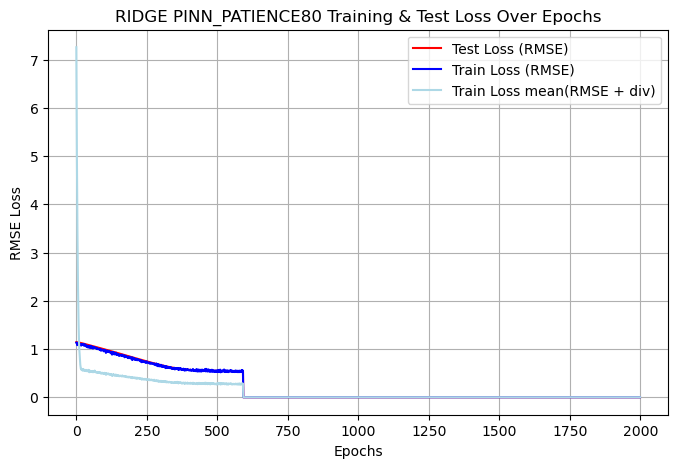

In [4]:
model_name = "PINN_PATIENCE80"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_PINN_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss (RMSE)", color = "red")
    # Scale it?
    # plt.plot(losses["Epoch"], losses["Test Loss"] * 0.3, label = "Test Loss", color = "pink")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss (RMSE)", color = "blue")
    plt.plot(losses["Epoch"], losses["Train Loss"], label = "Train Loss mean(RMSE + div)", color = "lightblue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

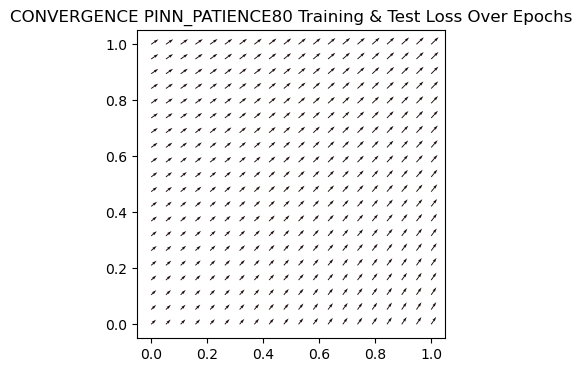

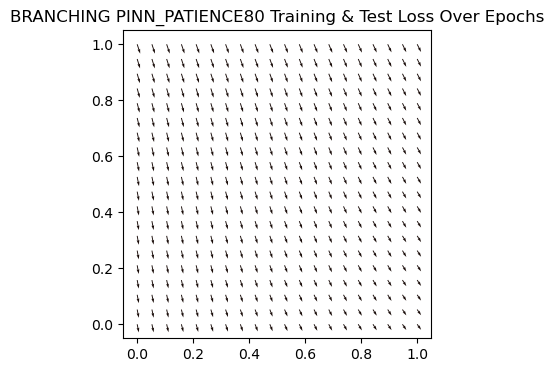

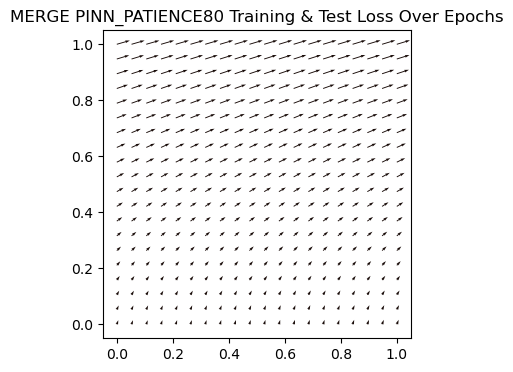

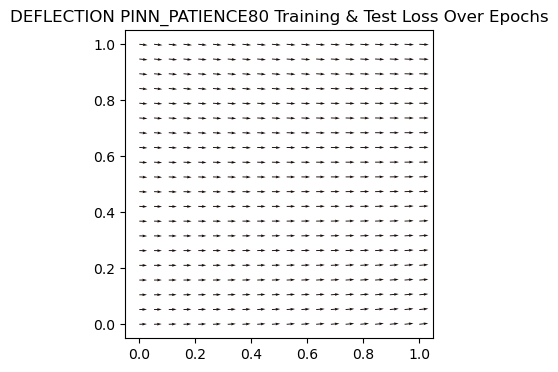

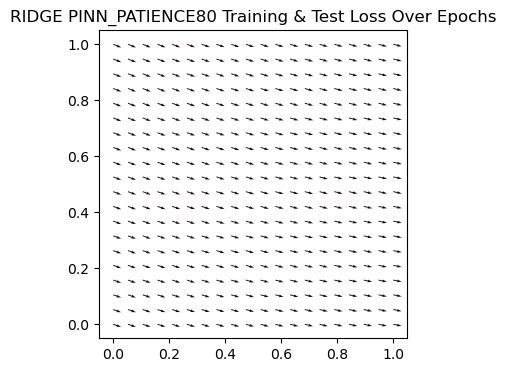

In [5]:
model_name = "PINN_PATIENCE80"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_PINN_test_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Training & Test Loss Over Epochs"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# dfGP

### Plot NLML loss (which we minimize)

In [ ]:
model_name = "dfGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

## Plot RMSE

In [ ]:
model_name = "dfGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Test Loss RMSE"], label = "Test Loss", color = "red")
    plt.plot(losses["Epoch"], losses["Train Loss RMSE"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

## Plot hypers

In [ ]:
model_name = "dfGP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_dfGP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Sigma_f"], label = "Sigma f", color = "cornflowerblue")
    plt.plot(losses["Epoch"], losses["l1"], label = "l1", color = "green")
    plt.plot(losses["Epoch"], losses["l2"], label = "l2", color = "grey")
    plt.ylim(0, None) # here we fix y_min to zero
    plt.xlabel("Epochs")
    plt.ylabel("RMSE Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training & Test Loss (RMSE) over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
model_name = "dfGP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_dfGP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

# GP

In [ ]:
model_name = "GP"
results_dir = "results/"

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = results_dir + model_name + "/" + sim_name + "_GP_losses_over_epochs.csv"
    losses = pd.read_csv(path)

    plt.figure(figsize = (8, 5))
    # Test loss will likely be >> Train loss so define first
    plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Test Loss", color = "red")
    # plt.plot(losses["Epoch"], losses["Train Loss NLML"], label = "Train Loss", color = "blue")
    plt.xlabel("Epochs")
    plt.ylabel("NLML Loss")
    plt.title(f"{sim_name.upper()} {model_name} Training Loss (NLML) over Epochs")
    plt.legend()
    plt.grid()

    plt.show()

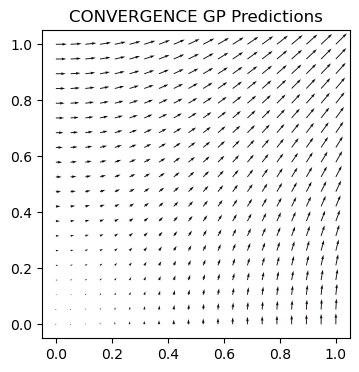

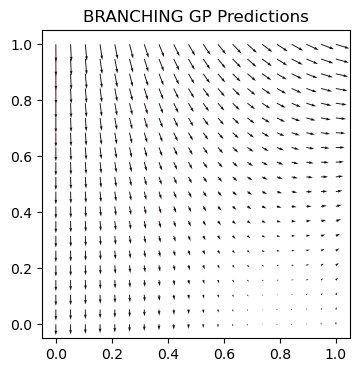

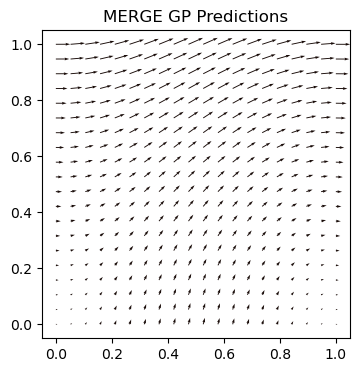

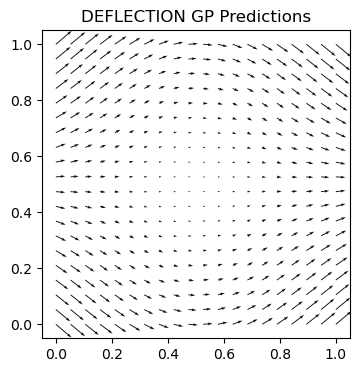

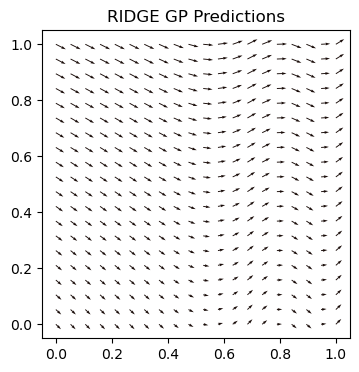

In [3]:
model_name = "GP"

N_SIDE = 20
side_array = torch.linspace(start = 0.0, end = 1.0, steps = N_SIDE)
XX, YY = torch.meshgrid(side_array, side_array, indexing = "xy")
x_test_grid = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim = -1)
# long format
x_test = x_test_grid.reshape(-1, 2)

for sim_name, _ in simulations.items():
    # print(sim_name)
    path = "results/" + model_name + "/" + sim_name + "_GP_test_mean_predictions.pt"
    pred = torch.load(path, weights_only = False) # tensor

    title = f"{sim_name.upper()} {model_name} Predictions"

    visualise_v_quiver(pred.detach().cpu(), x_test, title_string = title)

In [7]:
model_name = "GP"
for sim_name, _ in simulations.items():
    path_mean = "results/" + model_name + "/" + sim_name + "_GP_test_mean_predictions.pt"
    path_covar = "results/" + model_name + "/" + sim_name + "_GP_test_covar_predictions.pt"
    mean = torch.load(path_mean, weights_only = False) # tensor
    covar = torch.load(path_covar, weights_only = False) # tensor
    break

In [8]:
def sample_posterior(mean, covar, n_samples = 10):
    samples = torch.distributions.MultivariateNormal(mean, covar).sample((n_samples,))
    return samples

In [ ]:
predictive_covariance_jitter = predictive_covariance + 1e-5 * torch.eye(predictive_covariance.shape[0])
# predictive_covariance_jittery = predictive_covariance + (torch.eye(predictive_covariance.shape[0]) * torch.absolute(torch.min(torch.linalg.eigvalsh(predictive_covariance), torch.tensor(0.0))) * 1)
z = torch.randn(n_samples, predictive_mean.shape[0])
L_predictive = torch.linalg.cholesky(predictive_covariance_jitter, upper = False)

samples = predictive_mean.tile(1, n_samples).mT + torch.matmul(z, L_predictive.mT)

torch.Size([400, 2])

In [23]:
L_predictive = torch.linalg.cholesky(predictive_covariance_jitter, upper = False)
L_predictive.shape

NameError: name 'predictive_covariance_jitter' is not defined

In [22]:
mean.tile(1, 10).mT.shape

torch.Size([20, 400])

In [ ]:
def sample_posterior(posterior_mean, posterior_covariance, n_samples = 10):
    """_summary_

    Args:
        posterior_mean (torch.Size([N, 2])): mean
        posterior_covariance (torch.Size([2 x N, 2 x N])): full covariance matrix
        n_samples (int, optional): Number of samples to draw. Defaults to 10.

    Returns:
        samples (torch.Size([n_samples, 2])): _description_
    """
    posterior_mean = posterior_mean.mT

    # Add jitter to diagonal for robust cholesky decomposition
    posterior_covariance_with_jitter = posterior_covariance + 1e-3 * torch.eye(posterior_covariance.shape[0]).to(posterior_covariance.device)
    # Compute Cholesky decomposition
    # print(L_posterior.shape): torch.Size([2 x N, 2 x N])
    L_posterior = torch.linalg.cholesky(posterior_covariance_with_jitter, upper = False)
    
    # Sample from normal to achieve shape (n_samples, n_features)
    z = torch.randn(n_samples, posterior_mean.shape[0])

    samples = posterior_mean.tile(1, n_samples).mT + torch.matmul(z, L_posterior.mT)

    return samples

In [45]:
posterior_mean = mean.mT

z = torch.randn(10, posterior_mean.shape[0])
z.shape

torch.Size([10, 2])

In [35]:
sample_posterior(mean.cpu().reshape(-1), covar.cpu(), n_samples = 10)

torch.Size([800, 800])


RuntimeError: The size of tensor a (8000) must match the size of tensor b (10) at non-singleton dimension 0

In [ ]:
n_samples = 4

predictive_covariance_jitter = predictive_covariance + 1e-5 * torch.eye(predictive_covariance.shape[0])
# predictive_covariance_jittery = predictive_covariance + (torch.eye(predictive_covariance.shape[0]) * torch.absolute(torch.min(torch.linalg.eigvalsh(predictive_covariance), torch.tensor(0.0))) * 1)
z = torch.randn(n_samples, predictive_mean.shape[0])
L_predictive = torch.linalg.cholesky(predictive_covariance_jitter, upper = False)

samples = predictive_mean.tile(1, n_samples).mT + torch.matmul(z, L_predictive.mT)